In [19]:
# test.py
from D0ToKSpipi2018 import *

# Create an instance to check if the issue is resolved
obj = PyD0ToKSpipi2018()
obj.init()  # Call some methods to ensure functionality

D0ToKSpipi2018 (Apr 30 2024) ==> Initialization !


In [20]:
import uproot as up
import numpy as np
import cupy as cp
import matplotlib.pyplot as plt
int_path='/software/pc24403/PCBPGGSZ/Int'
f = up.open(int_path+'/weighted_b2dpi_LL_p.root:DalitzEventList')
branch_names = ["_1_K0S0_E", "_1_K0S0_Px", "_1_K0S0_Py", "_1_K0S0_Pz",
                         "_2_pi#_E", "_2_pi#_Px", "_2_pi#_Py", "_2_pi#_Pz",
                         "_3_pi~_E", "_3_pi~_Px", "_3_pi~_Py", "_3_pi~_Pz"]


array = f.arrays(branch_names)
_p1 = np.asarray([array["_1_K0S0_E"], array["_1_K0S0_Px"], array["_1_K0S0_Py"], array["_1_K0S0_Pz"]])
_p2 = np.asarray([array["_2_pi#_E"], array["_2_pi#_Px"], array["_2_pi#_Py"], array["_2_pi#_Pz"]])
_p3 = np.asarray([array["_3_pi~_E"], array["_3_pi~_Px"], array["_3_pi~_Py"], array["_3_pi~_Pz"]])

# convert 4*1000 into a vectot<double>
p1 = np.transpose(_p1)
p2 = np.transpose(_p2)
p3 = np.transpose(_p3)

p1bar = np.hstack((p1[:, :1], np.negative(p1[:, 1:])))
p2bar = np.hstack((p2[:, :1], np.negative(p2[:, 1:])))
p3bar = np.hstack((p3[:, :1], np.negative(p3[:, 1:])))



In [21]:
print(p1)

[[ 0.72667222  0.38910073  0.3382009   0.12105205]
 [ 0.52470529  0.08646234 -0.11523611 -0.08331174]
 [ 0.92568924  0.57752217  0.32489352  0.4125448 ]
 ...
 [ 0.88857251  0.30192552 -0.66217221 -0.11095205]
 [ 0.82845861 -0.48226033 -0.19787192  0.40865102]
 [ 0.55099282  0.05417231 -0.01929997  0.22949133]]


In [22]:
def get_mass(p1,p2):
    return ((p1[:,0]+p2[:,0])**2 - (p1[:,1]+p2[:,1])**2 - (p1[:,2]+p2[:,2])**2 - (p1[:,3]+p2[:,3])**2)


In [23]:
s12 = get_mass(p1[:100000], p2[:100000])
s13 = get_mass(p1[:100000], p3[:100000])
s23 = get_mass(p2[:100000], p3[:100000])

In [24]:
amp = []
ampbar = []
for i in range(100000):
    amp.append(obj.AMP(p1[i].tolist(), p3[i].tolist(), p2[i].tolist()))
    ampbar.append(obj.AMP(p1bar[i].tolist(), p3bar[i].tolist(), p2bar[i].tolist()))

In [25]:
amp = np.array(amp)
ampbar = np.array(ampbar)

In [26]:
def DeltadeltaD(A, Abar):
    temp_var = np.angle(A*np.conj(Abar))-np.pi
    var_1 = np.where(temp_var < -np.pi, temp_var+2*np.pi, temp_var)
    var = np.where(var_1 > np.pi, var_1 - 2*np.pi, var_1)

    return var

In [27]:
np.where(np.isnan(amp**2))

(array([], dtype=int64),)

In [28]:
phaseDiff = DeltadeltaD(amp, ampbar)


(array([  651.94257612,   889.0658304 ,   862.19705884,  1000.0419856 ,
          980.72072448,  1014.89667575,  1106.80526415,  1119.49473895,
         1251.19195009,  1474.91360053,  1785.57336115,  2430.50460613,
         3693.58089009,  7387.65236327, 13518.25850834, 15324.03757578,
        10686.74637939,  6415.78770806,  4557.85832763,  3331.58653827,
         2582.53216137,  2038.03790068,  1806.40375669,  1526.28737051,
         1273.9508696 ,  1138.62336413,   966.24685288,   913.27378203,
          824.43365244,   759.42901378,   702.47416287,   658.46233934,
          627.6807559 ,   633.97494837,   583.95670884,   562.76969355,
          549.14127224,   519.20533375,   501.08824056,   469.97064751,
          483.28342853,   450.54998694,   512.04690808,   481.99913446,
          502.16865186,   466.61203773,   447.10625258,   460.16788825,
          457.51986671,   435.84044816,   444.3772983 ,   438.68679479,
          467.12890323,   492.72905754,   507.88360891,   514.76

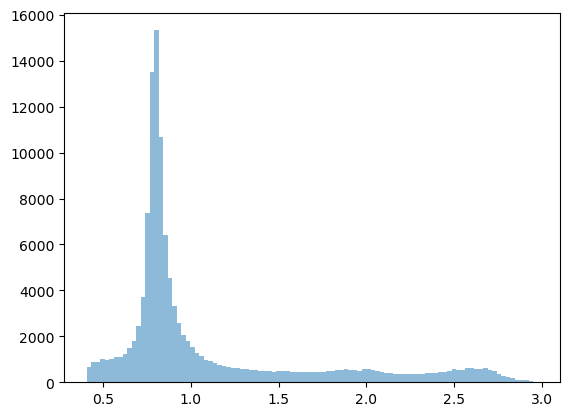

In [29]:
plt.hist(s13, bins=100, alpha=0.5, label='s12', weights=np.abs(amp)**2)

(array([ 313.6558904 ,  612.58544144,  792.0216322 , 1143.28806467,
        1341.34126667, 1322.41992854, 1358.39330432, 1266.25262063,
        1261.20601701, 1226.63883832, 1194.35822949, 1139.04388535,
        1092.13221421,  976.01280272,  706.3635484 ,  605.57988423,
         627.89838604,  658.05900544,  801.34486021,  808.96971593,
         868.60697639,  899.57367509,  981.02046852, 1003.31107319,
        1320.16792182, 1465.67437479, 1827.35137883, 2137.21860088,
        2611.65777592, 3138.69938203, 3449.1112001 , 3561.91093655,
        2868.78237266, 3091.36909656, 2369.69966389, 2996.51048493,
        2738.43299497, 2263.33322176, 2151.65539917, 2037.59334175,
        2057.9018804 , 1767.3169969 , 1622.11738505, 1741.18621115,
        1282.53069823, 1300.56086243, 1157.67002204,  957.8956206 ,
         894.96658182,  784.75293994,  760.89454819,  679.13222187,
         552.67942138,  563.56667072,  517.77239546,  421.4128025 ,
         386.67344831,  350.31399602,  319.58321

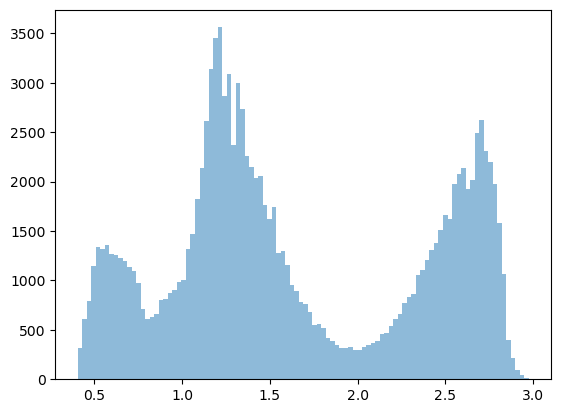

In [30]:
plt.hist(s12, bins=100, alpha=0.5, label='s12', weights=np.abs(amp)**2)

(array([[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ..., 10.97174038,
                 nan,         nan],
        [        nan,         nan,         nan, ..., 13.69609996,
          6.06697033,  4.12346406],
        ...,
        [        nan, 13.293537  , 17.30604184, ...,         nan,
                 nan,         nan],
        [        nan,  4.98000706, 11.21522105, ...,         nan,
                 nan,         nan],
        [        nan,         nan,  3.59558574, ...,         nan,
                 nan,         nan]]),
 array([0.40637659, 0.4320513 , 0.45772602, 0.48340073, 0.50907545,
        0.53475016, 0.56042488, 0.58609959, 0.61177431, 0.63744902,
        0.66312373, 0.68879845, 0.71447316, 0.74014788, 0.76582259,
        0.79149731, 0.81717202, 0.84284674, 0.86852145, 0.89419617,
        0.91987088, 0.9455456 , 0.97122031, 0.99689503, 1.02256974,
        1.04824446, 1.07391917, 1

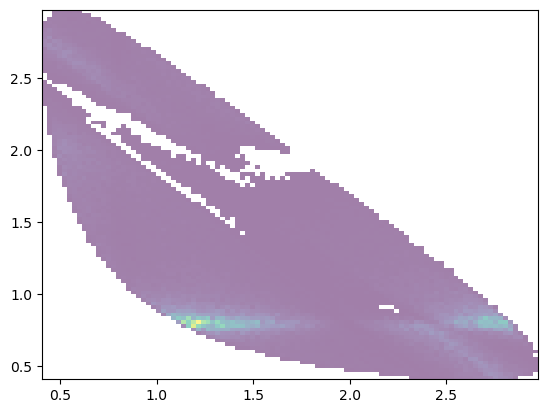

In [31]:
plt.hist2d(s12, s13, bins=100, alpha=0.5, label='s12', weights=np.abs(amp)**2, cmap='viridis', cmin=1)


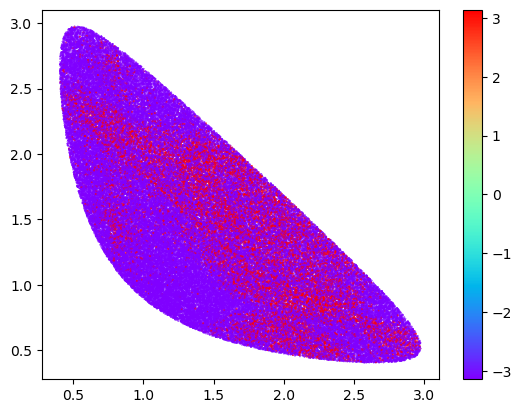

In [32]:
plt.scatter(s12, s13, c=phaseDiff, cmap='rainbow',s=0.1)
plt.colorbar()

In [33]:
import tensorflow as tf
def totalAmplitudeSquared_Integrated_crossTerm(A, Abar):
    '''
    This function calculates the total amplitude squared for the integrated decay, v0.1 only for MD fitted, no correction yet
    '''

    phase = DeltadeltaD(A, Abar)
    
    real_part = cp.sum(cp.abs(A.real)*cp.abs(Abar.real)*cp.cos(phase))
    imag_part = cp.sum(cp.abs(A.real)*cp.abs(Abar.real)*cp.sin(phase))

    print(phase.shape[1])

    return (real_part/A.shape[1], imag_part/Abar.shape[1])

In [34]:
normalisationCrossTerms_p = totalAmplitudeSquared_Integrated_crossTerm(amp, ampbar)

TypeError: Unsupported type <class 'numpy.ndarray'>

In [ ]:
amp[:,:1]


array([[4.17171231+4.06239963j]])

In [ ]:
cp.abs(amp[:,:1])

array([[5.82290945]])

In [ ]:
mod = amp[:,:1]*cp.conj(amp[:,:1])

In [ ]:
print(cp.abs(mod))

[[33.90627441]]


In [ ]:
A = complex(4.17171231, 4.06239963)

In [ ]:
cp.abs(A)**2

array(33.90627435)

In [ ]:
def abs(A):
    return cp.abs(A*cp.conj(A))

In [ ]:
abs(A)

array(33.90627435)

In [ ]:
import tensorflow as tf
from tensorflow.python.ops.resource_variable_ops import ResourceVariable

In [ ]:
tf.log(A)

AttributeError: module 'tensorflow' has no attribute 'log'